# ROC Example

Code is based on: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
First we need to import libraries and prepare data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

Change the output, add some noisy features, split data, and fit model.

Do not worry about the OneVsRestClassifier for now. It is a classification example.

In [2]:
# Binarize the output
print(y.shape)
print(y[:5])
# originally, class is represented by 0, 1, 2
# after binarize label, it turns into 100, 010, and 001
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
print(y.shape)
print(y[:5])

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
# because X.shape is (150, 4)
# n_samples = 150, n_features = 4
n_samples, n_features = X.shape

# example about np.c_
# combine two matrices
print(np.c_[np.array([1,2,3]), np.array([4,5,6])])
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]



# shuffle and split training and test sets
# test_size = 0.5 means 50% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
# this score is the distance of each sample from the decision boundary for each class.
# similar to K-means, sample distance to centroids
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# we have three possible classes, therefore three distances for each data point
print(y_score[:5])

(150,)
[0 0 0 0 0]
(150, 3)
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]
[[1 4]
 [2 5]
 [3 6]]
[[-0.76301132 -0.36482547  0.12386354]
 [-0.20224493 -0.63144366 -0.16612302]
 [ 0.11801481 -0.80263073 -0.32055874]
 [-0.90780855 -0.12395478  0.02199789]
 [-0.01116192 -0.27913475 -0.71889214]]


Calculate fpr and tpr

In [3]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # roc_curve return three things: fpr, tpr, and thresholds used to calcualte fpr and tpr
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# if you suspect there may be inbalance in your dataset, i.e., one class may have
# more data examples, you should use micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# how ravel() works: 
# return a contiguous flattened array
m = np.array([[1, 2, 3], [4, 5, 6]])
print(m)
print(np.ravel(m))

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


# Group Activity

Finish the graph and following these requirements:

X data: fpr[“micro”]

Y data: tpr[“micro”]

X axis from 0 – 1

Y axis from 0 – 1.5

X label: False Positive Rate

Y label: True Positive Rate

Title: Receiver operating characteristic example

Legend position: lower right

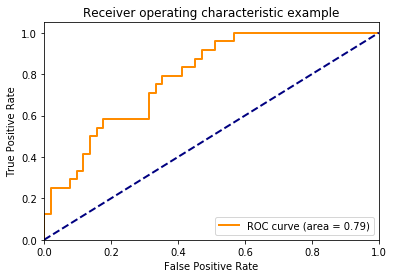

In [36]:
plt.figure()
# line width
lw = 2
# TODO from here
plt.plot('''X data''', '''Y data''', color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])

# Multiple Classes

<ipython-input-4-ce4191a0f232>:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


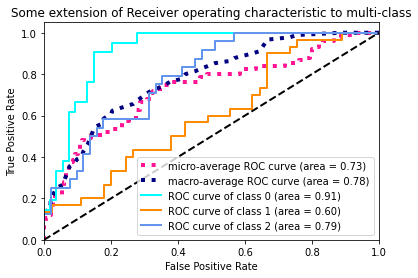

In [4]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
# np.unique remove repeat elements
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    # predict mean tpr based on linear relation between fpr and tpr
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()